In [ ]:
import pandas as pd

In [ ]:
url = "https://raw.githubusercontent.com/Souradeep2233/UAV-AIOT_COLLAB/master/cleaned_dataset.csv?token=GHSAT0AAAAAACAKJ7LKJZB4T6ELCTPP3K26ZBJAZSA"
df = pd.read_csv(url)

In [ ]:
df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,sealevelpressure,conditions
0,23.0,16.0,19.1,23.0,16.0,19.1,15.1,79.3,0.0,0.0,0.0,1018.6,Clear
1,23.0,14.0,17.9,23.0,14.0,17.9,14.6,82.3,0.0,0.0,0.0,1017.3,cloudy
2,24.0,14.0,18.4,24.0,14.0,18.4,14.1,77.6,0.0,0.0,0.0,1015.9,Clear
3,23.0,13.0,17.6,23.0,13.0,17.6,13.4,78.0,0.0,0.0,0.0,1016.6,Clear
4,24.0,13.0,17.9,24.0,13.0,17.9,13.0,75.7,0.0,0.0,0.0,1015.8,Clear


In [ ]:
df.conditions.unique()
# Multinomial Logistic Regression

array(['Clear', 'cloudy', 'rainy'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
X = df.iloc[:,0:12]
Y = df.iloc[: , -1]

In [ ]:
X.drop(['feelslikemin','feelslikemax','precipcover'] , axis = 1 , inplace = True )

<Axes: xlabel='temp', ylabel='conditions'>

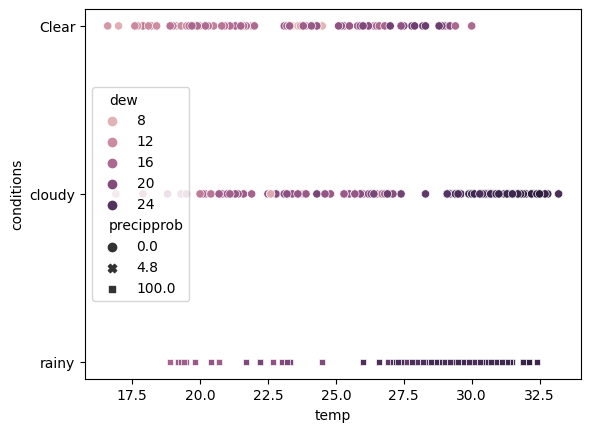

In [ ]:
import seaborn as sns
sns.scatterplot(data = df , x = "temp" , y = "conditions" , hue = "dew" , style = "precipprob")
# Data is very linear thus no Polynomial

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 180)

In [ ]:
encoder = LabelEncoder()
Y_train_tf = encoder.fit_transform(Y_train)
Y_test_tf = encoder.transform(Y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
clf = LogisticRegression(multi_class = 'multinomial')

In [ ]:
clf.fit(X_train , Y_train_tf)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
Y_pred = clf.predict(X_test)

In [ ]:
print(accuracy_score(Y_test_tf , Y_pred))

0.9620253164556962


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_test, Y_test_tf, cv=5)
scores

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

array([1.    , 0.8125, 0.9375, 1.    , 1.    ])

In [ ]:
pd.DataFrame(confusion_matrix(Y_test_tf , Y_pred))

,0,1,2
0,18,3,0
1,4,23,0
2,0,0,31
